### 1. Import modules

In [31]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.svm import SVC

### 2. Load training and testing data

In [26]:
# Load datasets
present_data = pd.read_csv("data/epl-training.csv")
future_data = pd.read_csv("data/epl-test.csv")


# Format data
home_team_df = pd.get_dummies(present_data.HomeTeam, drop_first=True)
home_team_df.columns = home_team_df.columns.map(lambda s : f"home({s})")

away_team_df = pd.get_dummies(present_data.AwayTeam, drop_first=True)
away_team_df.columns = home_team_df.columns.map(lambda s : f"away({s})")

y = present_data["FTR"]
X = present_data[["DateStamp"]].join(home_team_df).join(away_team_df)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Create SVM model

Specifically, we are going to fit our model to our data and then predict the testing results

In [28]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X=X_train, y=y_train)

y_pred = clf.predict(X_test)

### 4. Get performance metrics

We're going to print a classification report and print some graphs and charts now

In [35]:
print(classification_report(y_test, y_pred, target_names=["H", "D", "A"]))

              precision    recall  f1-score   support

           D       0.48      0.50      0.49       516
           H       0.30      0.05      0.09       460
           A       0.54      0.78      0.64       792

    accuracy                           0.51      1768
   macro avg       0.44      0.44      0.41      1768
weighted avg       0.46      0.51      0.45      1768



### 5. Plot graphs

We're going to plot the following graphs and charts:
- confusion matrix

5304
5304


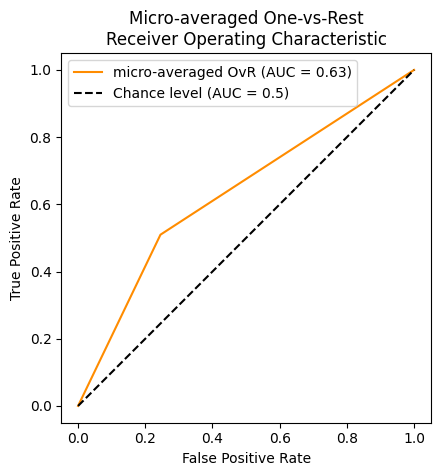